In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [ ]:
# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

There are five files with the results of the survey.

1. **schema.csv **- A CSV file with survey schema. This schema includes the questions that correspond to each column name in both the multipleChoiceResponses.csv and freeformResponses.csv.
2. **RespondentTypeREADME.txt **- This is a schema for decoding the responses in the "Asked" column of the schema.csv file.
3. **multipleChoiceResponses.csv **- Respondents' answers to multiple choice and ranking questions. These are non-randomized and thus a single row does correspond to all of a single user's answers.
4. **freeformResponses.csv** - Respondents' freeform answers to Kaggle's survey questions. These responses are randomized within a column, so that reading across a single row does not give a single user's answers.
5. **conversionRates.csv **- Currency conversion rates (to USD) as accessed from the R package "quantmod" on September 14, 2017.

Let us start our analysis by looking at the data from from multipleChoiceResponses.csv file

In [2]:
mcr_df = pd.read_csv("../data/2017_multipleChoiceResponses.csv", encoding="ISO-8859-1", low_memory=False)
mcr_df.shape

(16716, 228)

In [3]:
mcr_df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,JobSkillImportancePython,JobSkillImportanceR,JobSkillImportanceSQL,JobSkillImportanceKaggleRanking,JobSkillImportanceMOOC,JobSkillImportanceVisualizations,JobSkillImportanceOtherSelect1,JobSkillImportanceOtherSelect2,JobSkillImportanceOtherSelect3,CoursePlatformSelect,HardwarePersonalProjectsSelect,TimeSpentStudying,ProveKnowledgeSelect,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,FirstTrainingSelect,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,MLSkillsSelect,MLTechniquesSelect,ParentsEducation,EmployerIndustry,EmployerSize,EmployerSizeChange,EmployerMLTime,EmployerSearchMethod,UniversityImportance,JobFunctionSelect,WorkHardwareSelect,WorkDataTypeSelect,WorkProductionFrequency,WorkDatasetSize,WorkAlgorithmsSelect,WorkToolsSelect,WorkToolsFrequencyAmazonML,WorkToolsFrequencyAWS,WorkToolsFrequencyAngoss,WorkToolsFrequencyC,WorkToolsFrequencyCloudera,WorkToolsFrequencyDataRobot,WorkToolsFrequencyFlume,WorkToolsFrequencyGCP,WorkToolsFrequencyHadoop,WorkToolsFrequencyIBMCognos,WorkToolsFrequencyIBMSPSSModeler,WorkToolsFrequencyIBMSPSSStatistics,WorkToolsFrequencyIBMWatson,WorkToolsFrequencyImpala,WorkToolsFrequencyJava,WorkToolsFrequencyJulia,WorkToolsFrequencyJupyter,WorkToolsFrequencyKNIMECommercial,WorkToolsFrequencyKNIMEFree,WorkToolsFrequencyMathematica,WorkToolsFrequencyMATLAB,WorkToolsFrequencyAzure,WorkToolsFrequencyExcel,WorkToolsFrequencyMicrosoftRServer,WorkToolsFrequencyMicrosoftSQL,WorkToolsFrequencyMinitab,WorkToolsFrequencyNoSQL,WorkToolsFrequencyOracle,WorkToolsFrequencyOrange,WorkToolsFrequencyPerl,WorkToolsFrequencyPython,WorkToolsFrequencyQlik,WorkToolsFrequencyR,WorkToolsFrequencyRapidMinerCommercial,WorkToolsFrequencyRapidMinerFree,WorkToolsFrequencySalfrod,WorkToolsFrequencySAPBusinessObjects,WorkToolsFrequencySASBase,WorkToolsFrequencySASEnterprise,WorkToolsFrequencySASJMP,WorkToolsFrequencySpark,WorkToolsFrequencySQL,WorkToolsFrequencyStan,WorkToolsFrequencyStatistica,WorkToolsFrequencyTableau,WorkToolsFrequencyTensorFlow,WorkToolsFrequencyTIBCO,WorkToolsFrequencyUnix,WorkToolsFrequencySelect1,WorkToolsFrequencySelect2,WorkFrequencySelect3,WorkMethodsSelect,WorkMethodsFrequencyA/B,WorkMethodsFrequencyAssociationRules,WorkMethodsFrequencyBayesian,WorkMethodsFrequencyCNNs,WorkMethodsFrequencyCollaborativeFiltering,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyEnsembleMethods,WorkMethodsFrequencyEvolutionaryApproaches,WorkMethodsFrequencyGANs,WorkMethodsFrequencyGBM,WorkMethodsFrequencyHMMs,WorkMethodsFrequencyKNN,WorkMethodsFrequencyLiftAnalysis,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyMLN,WorkMethodsFrequencyNaiveBayes,WorkMethodsFrequencyNLP,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyPrescripti

**Understanding the Respondents:**

Let us first try to understand the respondents who took the survey. We know that most of the respondents were found primarily through Kaggle channels, like our email list, discussion forums and social media channels.

But let us try to understand more about their demographics from the aspects of age, gender, locality, experience etc

**Gender:**

In [4]:
temp_series = mcr_df['GenderSelect'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Gender distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="gender")

A high number of respondents are males compared to females

**Employment Status:**

In [5]:
temp_series = mcr_df['EmploymentStatus'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Employment Status distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="employmentstatus")

Employed full time forms the major chunk followed by people looking for work

**Age:**

Let us look at the histaogram of age.

In [7]:
cnt_srs = mcr_df['Age'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='viridis',
        showscale=True
    ),
)
layout = go.Layout(
    title='Age distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="age")

Majority of the people have age between 18 to 60. Clearly we can see some increments is round values like 20, 25, 30 and so on. 

Also looks like we have few respondents with age 0 and 100 ;) 

**Country:**

Let us look at the top countries from where we get the responses.

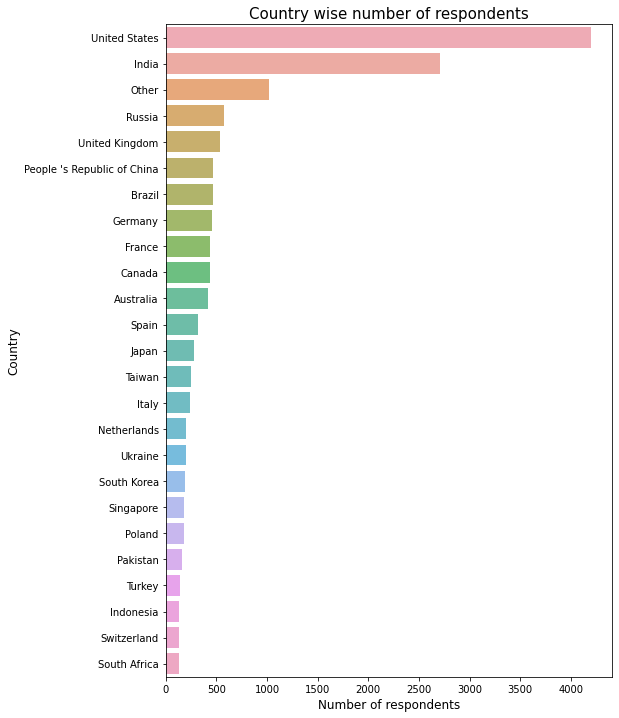

In [8]:
cnt_srs = mcr_df['Country'].value_counts().head(25)
plt.figure(figsize=(8,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Number of respondents', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title("Country wise number of respondents", fontsize=15)
plt.show()

In [11]:
LOCDATA="""COUNTRY,GDP (BILLIONS),CODE
Afghanistan,21.71,AFG
Albania,13.40,ALB
Algeria,227.80,DZA
American Samoa,0.75,ASM
Andorra,4.80,AND
Angola,131.40,AGO
Anguilla,0.18,AIA
Antigua and Barbuda,1.24,ATG
Argentina,536.20,ARG
Armenia,10.88,ARM
Aruba,2.52,ABW
Australia,1483.00,AUS
Austria,436.10,AUT
Azerbaijan,77.91,AZE
"Bahamas, The",8.65,BHM
Bahrain,34.05,BHR
Bangladesh,186.60,BGD
Barbados,4.28,BRB
Belarus,75.25,BLR
Belgium,527.80,BEL
Belize,1.67,BLZ
Benin,9.24,BEN
Bermuda,5.20,BMU
Bhutan,2.09,BTN
Bolivia,34.08,BOL
Bosnia and Herzegovina,19.55,BIH
Botswana,16.30,BWA
Brazil,2244.00,BRA
British Virgin Islands,1.10,VGB
Brunei,17.43,BRN
Bulgaria,55.08,BGR
Burkina Faso,13.38,BFA
Burma,65.29,MMR
Burundi,3.04,BDI
Cabo Verde,1.98,CPV
Cambodia,16.90,KHM
Cameroon,32.16,CMR
Canada,1794.00,CAN
Cayman Islands,2.25,CYM
Central African Republic,1.73,CAF
Chad,15.84,TCD
Chile,264.10,CHL
"People 's Republic of China",10360.00,CHN
Colombia,400.10,COL
Comoros,0.72,COM
"Congo, Democratic Republic of the",32.67,COD
"Congo, Republic of the",14.11,COG
Cook Islands,0.18,COK
Costa Rica,50.46,CRI
Cote d'Ivoire,33.96,CIV
Croatia,57.18,HRV
Cuba,77.15,CUB
Curacao,5.60,CUW
Cyprus,21.34,CYP
Czech Republic,205.60,CZE
Denmark,347.20,DNK
Djibouti,1.58,DJI
Dominica,0.51,DMA
Dominican Republic,64.05,DOM
Ecuador,100.50,ECU
Egypt,284.90,EGY
El Salvador,25.14,SLV
Equatorial Guinea,15.40,GNQ
Eritrea,3.87,ERI
Estonia,26.36,EST
Ethiopia,49.86,ETH
Falkland Islands (Islas Malvinas),0.16,FLK
Faroe Islands,2.32,FRO
Fiji,4.17,FJI
Finland,276.30,FIN
France,2902.00,FRA
French Polynesia,7.15,PYF
Gabon,20.68,GAB
"Gambia, The",0.92,GMB
Georgia,16.13,GEO
Germany,3820.00,DEU
Ghana,35.48,GHA
Gibraltar,1.85,GIB
Greece,246.40,GRC
Greenland,2.16,GRL
Grenada,0.84,GRD
Guam,4.60,GUM
Guatemala,58.30,GTM
Guernsey,2.74,GGY
Guinea-Bissau,1.04,GNB
Guinea,6.77,GIN
Guyana,3.14,GUY
Haiti,8.92,HTI
Honduras,19.37,HND
Hong Kong,292.70,HKG
Hungary,129.70,HUN
Iceland,16.20,ISL
India,2048.00,IND
Indonesia,856.10,IDN
Iran,402.70,IRN
Iraq,232.20,IRQ
Ireland,245.80,IRL
Isle of Man,4.08,IMN
Israel,305.00,ISR
Italy,2129.00,ITA
Jamaica,13.92,JAM
Japan,4770.00,JPN
Jersey,5.77,JEY
Jordan,36.55,JOR
Kazakhstan,225.60,KAZ
Kenya,62.72,KEN
Kiribati,0.16,KIR
"Korea, North",28.00,PRK
"Korea, South",1410.00,KOR
Kosovo,5.99,KSV
Kuwait,179.30,KWT
Kyrgyzstan,7.65,KGZ
Laos,11.71,LAO
Latvia,32.82,LVA
Lebanon,47.50,LBN
Lesotho,2.46,LSO
Liberia,2.07,LBR
Libya,49.34,LBY
Liechtenstein,5.11,LIE
Lithuania,48.72,LTU
Luxembourg,63.93,LUX
Macau,51.68,MAC
Macedonia,10.92,MKD
Madagascar,11.19,MDG
Malawi,4.41,MWI
Malaysia,336.90,MYS
Maldives,2.41,MDV
Mali,12.04,MLI
Malta,10.57,MLT
Marshall Islands,0.18,MHL
Mauritania,4.29,MRT
Mauritius,12.72,MUS
Mexico,1296.00,MEX
"Micronesia, Federated States of",0.34,FSM
Moldova,7.74,MDA
Monaco,6.06,MCO
Mongolia,11.73,MNG
Montenegro,4.66,MNE
Morocco,112.60,MAR
Mozambique,16.59,MOZ
Namibia,13.11,NAM
Nepal,19.64,NPL
Netherlands,880.40,NLD
New Caledonia,11.10,NCL
New Zealand,201.00,NZL
Nicaragua,11.85,NIC
Nigeria,594.30,NGA
Niger,8.29,NER
Niue,0.01,NIU
Northern Mariana Islands,1.23,MNP
Norway,511.60,NOR
Oman,80.54,OMN
Pakistan,237.50,PAK
Palau,0.65,PLW
Panama,44.69,PAN
Papua New Guinea,16.10,PNG
Paraguay,31.30,PRY
Peru,208.20,PER
Philippines,284.60,PHL
Poland,552.20,POL
Portugal,228.20,PRT
Puerto Rico,93.52,PRI
Qatar,212.00,QAT
Romania,199.00,ROU
Russia,2057.00,RUS
Rwanda,8.00,RWA
Saint Kitts and Nevis,0.81,KNA
Saint Lucia,1.35,LCA
Saint Martin,0.56,MAF
Saint Pierre and Miquelon,0.22,SPM
Saint Vincent and the Grenadines,0.75,VCT
Samoa,0.83,WSM
San Marino,1.86,SMR
Sao Tome and Principe,0.36,STP
Saudi Arabia,777.90,SAU
Senegal,15.88,SEN
Serbia,42.65,SRB
Seychelles,1.47,SYC
Sierra Leone,5.41,SLE
Singapore,307.90,SGP
Sint Maarten,304.10,SXM
Slovakia,99.75,SVK
Slovenia,49.93,SVN
Solomon Islands,1.16,SLB
Somalia,2.37,SOM
South Africa,341.20,ZAF
South Sudan,11.89,SSD
Spain,1400.00,ESP
Sri Lanka,71.57,LKA
Sudan,70.03,SDN
Suriname,5.27,SUR
Swaziland,3.84,SWZ
Sweden,559.10,SWE
Switzerland,679.00,CHE
Syria,64.70,SYR
Taiwan,529.50,TWN
Tajikistan,9.16,TJK
Tanzania,36.62,TZA
Thailand,373.80,THA
Timor-Leste,4.51,TLS
Togo,4.84,TGO
Tonga,0.49,TON
Trinidad and Tobago,29.63,TTO
Tunisia,49.12,TUN
Turkey,813.30,TUR
Turkmenistan,43.50,TKM
Tuvalu,0.04,TUV
Uganda,26.09,UGA
Ukraine,134.90,UKR
United Arab Emirates,416.40,ARE
United Kingdom,2848.00,GBR
United States,17420.00,USA
Uruguay,55.60,URY
Uzbekistan,63.08,UZB
Vanuatu,0.82,VUT
Venezuela,209.20,VEN
Vietnam,187.80,VNM
Virgin Islands,5.08,VGB
West Bank,6.64,WBG
Yemen,45.45,YEM
Zambia,25.61,ZMB
Zimbabwe,13.74,ZWE
    """

with open("location_map.csv", "w") as ofile:
    ofile.write(LOCDATA)

In [12]:
loc_df = pd.read_csv("location_map.csv")
new_df = pd.merge(mcr_df[["Country","Age"]], loc_df, left_on="Country", right_on="COUNTRY")
new_df = new_df.groupby(["Country", "CODE"])["Age"].aggregate('count').reset_index()
new_df.columns = ["Country", "Code", "Count"]
#new_df['Percentage'] =  new_df['Count'] / float(new_df["Count"].sum())

data = [ dict(
        type = 'choropleth',
        locations = new_df['Code'],
        z = new_df['Count'],
        text = new_df['Country'],
        #colorscale = [[0,"rgb(5, 10, 172)"],[10,"rgb(40, 60, 190)"],[20,"rgb(70, 100, 245)"],\
        #    [30,"rgb(90, 120, 245)"],[40,"rgb(200, 200, 200)"],[4500,"rgb(220, 220, 220)"]],
        colorscale = [[0,"rgb(210, 210, 210)"], [4500,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Count of respondents'),
      ) ]

layout = dict(
    title = 'Country wise number of respondents',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

Highest number of respondents are from US followed by India. Others is a category where if a country or territory received less than 50 respondents, Kaggle grouped them into a group named “Other” for anonymity.

**Formal Education:**

Let us look at the formal education status of the respondents

In [13]:
cnt_srs = mcr_df['FormalEducation'].value_counts()

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 50,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Portland',
        showscale=True
    ),
)

layout = go.Layout(
    title='Formal Education distribution'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="formaleducation")

Looks like most of the respondents have Masters degree followed by Bachelors and then Doctoral. Let us now look at the education of the parents.

**Parents Education:**

In [14]:
cnt_srs = mcr_df['ParentsEducation'].value_counts()

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 50,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Portland',
        showscale=True
    ),
)

layout = go.Layout(
    title='Parents Education distribution'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="ParentsEducation")

In parents education, bachelors comes first followed by masters and then high school. There seems to be an improvement in the highest level of education over years.

**Tenure:**

Tenure represents how long the respondents have been writing code to analyze the data. Let us look at it.

In [15]:
cnt_srs = mcr_df['Tenure'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Jet',
        showscale=True
    ),
)

layout = go.Layout(
    title='Tenure distribution'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="tenure")

Majority of them have less than 5 years of experience.!

**Students Analysis:**

**Student Status:**

This field tells whether the respondent has currently enrolled as a student at a degree granting school or not. This question is asked only for the people who are not working.

In [16]:
cnt_srs = mcr_df['StudentStatus'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        showscale=False
    ),
)

layout = go.Layout(
    title='StudentStatus distribution'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="studentstatus")

Majority of the students are from degree granting school. Now let us check whether the student respondents are learning data science skills formally or informally. Hopfully we will see a lot of yes since the survey mostly caters to Kaggle community.

**Students Learning Datascience:**

In [17]:
cnt_srs = mcr_df['LearningDataScience'].value_counts()

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 3,
        size = cnt_srs.values,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Portland',
        showscale=False
    ),
)

layout = go.Layout(
    title='Students Learning Data Science'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="LearningDataScience")

As expected most of the students are looking to learn DS.

**Working Professionals Analysis:**

Now let us look at the working professionals data. First let us start with how many people want to switch to DS career.

**Looking to Switch Jobs:**

In [18]:
temp_series = mcr_df['CareerSwitcher'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Working people looking for career switch'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="CareerSwitcher")

About 70% of the repondents are looking for a career switch.

**Current Job Title:**

Since most of the people are looking for a career switch, let us look a the job title of working professionals.

In [19]:
cnt_srs = mcr_df['CurrentJobTitleSelect'].value_counts()

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 20,
        size = cnt_srs.values,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Portland',
        showscale=True
    ),
)

layout = go.Layout(
    title='Current Job Title Distribution'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="CurrentJobTitleSelect")

Majority of the respondents have title as "Data Scientist" followed by "Software Developer".

Now let us see how many people believe that the title fits what they have been doing.

In [20]:
cnt_srs = mcr_df['TitleFit'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        showscale=False
    ),
)

layout = go.Layout(
    title='TitleFit distribution'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TitleFit")

Most of the people feel that the title is fine. Around 1700 people feel that the title fits poorly with what they do.!

Let us now look how many people write codes to analyze data of the respondents.

In [21]:
cnt_srs = mcr_df['CodeWriter'].value_counts()

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 40,
        size = cnt_srs.values,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Portland',
        showscale=False
    ),
)

layout = go.Layout(
    title='Writes code to analyze data'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="CodeWriter")

Majority of the respondents who work, write codes to analyze the data. Let us now look at the top employer type to understand more about them.

In [22]:
cnt_srs = mcr_df['CurrentEmployerType'].value_counts().head(20)

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Viridis',
        reversescale = True
    ),
)

layout = dict(
    title='Type of current employer',
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="CurrentEmployerType")

In [23]:
cnt_srs = mcr_df['EmployerSize'].value_counts()

index = ['Fewer than 10 employees', '10 to 19 employees', '20 to 99 employees', '100 to 499 employees', '500 to 999 employees', '1,000 to 4,999 employees', '5,000 to 9,999 employees', '10,000 or more employees', "I don't know", 'I prefer not to answer']
values = cnt_srs[index]

trace = go.Scatter(
    x=index,
    y=values,
    mode='markers',
    marker=dict(
        symbol='hexagram',
        sizemode = 'diameter',
        sizeref = 1,
        size = 50,
        #color = np.random.randn(500), #set color equal to a variable
        color = values,
        colorscale='Portland',
        showscale=True
    ),
)

layout = go.Layout(
    title='Employer Size'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="EmployerSize")

Most of the repondent's employers have a size of 10,000 or more employees. 

In [24]:
cnt_srs = mcr_df['EmployerIndustry'].value_counts()

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        symbol='star-diamond',
        sizemode = 'diameter',
        sizeref = 1,
        size = 50,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Portland',
        showscale=True
    ),
)

layout = go.Layout(
    title='Employer Industry distribution'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="EmployerIndustry")

Most of the employers are from Technology industry followed by Academics.

Now let us look at the the number of years the employer is using advanced analytics / datascience.

In [25]:
cnt_srs = mcr_df['EmployerMLTime'].value_counts().head(25)

index = ['Less than one year', '1-2 years', '3-5 years', '6-10 years', 'More than 10 years', "Don't know"]
values = cnt_srs[index]

trace = go.Bar(
    x=index,
    y=values,
    marker=dict(
        color=values,
        colorscale = 'Viridis',
        reversescale = True
    ),
)

layout = dict(
    title='Number of years employer using ML / DS',
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="EmployerMLTime")

There seems to be sudden drop in 6 to 10 years.

**Analysis on interesting questions asked to all participants:**

In this part, let us do some analysis on the interesting questions that has been asked to all the participants.

**Do you currently consider yourself a Data Scientist?**

What a question to begin with. Let us now see hoe people responded to that.

In [26]:
temp_series = mcr_df['DataScienceIdentitySelect'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Do you consider yourself a DS?'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="DataScienceIdentitySelect")

Interestingly, higher number of people said "no" than "yes". I was expecting the other way around though.

We can now see how these numbers change based on Employment status.

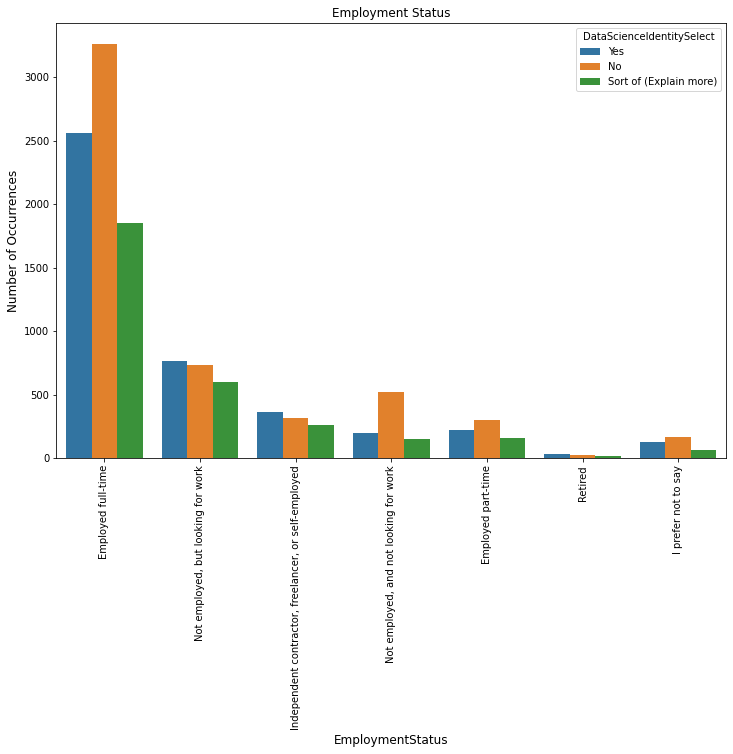

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x='EmploymentStatus', hue='DataScienceIdentitySelect', data=mcr_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('EmploymentStatus', fontsize=12)
plt.xticks(rotation=90)
plt.title("Employment Status")
plt.show()

Interestingly again, people who are employed answered "No" for this question than "Not Employed but looking for work" people.

**How did you first start your DS / ML training?**

Let us see what is the response for this question.

In [28]:
cnt_srs = mcr_df['FirstTrainingSelect'].value_counts()

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        symbol = 'diamond',
        sizemode = 'diameter',
        sizeref = 1,
        size = 50,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Portland',
        showscale=True
    ),
)

layout = go.Layout(
    title='How did you first start your ML / DS training?'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="FirstTrainingSelect")

Most people responded as online courses followed by university and self-taught. **There are quite a few people who started  through Kaggle competitions as well.**

**Which ML tool or technology are you most excited to learn next year?**

This is a very interesting question and I would love to know the answer as well.



In [29]:
cnt_srs = mcr_df['MLToolNextYearSelect'].value_counts().head(30)

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 20,
        size = cnt_srs.values,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Portland',
        showscale=True
    ),
)

layout = go.Layout(
    title='ML Tool / Technology to learn planning to learn next year'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="MLToolNextYearSelect")

Tensorflow seems to be a clear winner followed by Python and R. Big data technologies like Spark / MLlib, Hadoop are fast catching up as well.

**Which ML method are you most excited to learn next year?:**

Here is one more interesting question.

In [30]:
temp_series = mcr_df['MLMethodNextYearSelect'].value_counts().head(20)

labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='ML method planning to learn next year'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="MLMethodNextYearSelect")

In line with Tensorflow, Deep learning is the most popular method which people want to learn next year.!

** Which language would you recommend to a new DS to learn first?:**

One more interesting question to start the language war.

In [31]:
cnt_srs = mcr_df['LanguageRecommendationSelect'].value_counts().head(20)

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Viridis',
        reversescale = True
    ),
)
layout = dict(
    title='Which language do you recommend for new DS people?',
    )

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="LanguageRecommendationSelect")

Wow. Python is so tall followed by R. This also goes well with the previous two questions since tensorflow primarily used python and also many deep learning methods.

**Most important way to prove knowledge of ML / DS:**

One more nice question and let us see what people think.


In [34]:
cnt_srs = mcr_df['ProveKnowledgeSelect'].value_counts()

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        symbol = 'hexagon',
        sizemode = 'diameter',
        sizeref = 1,
        size = 50,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='viridis',
        showscale=True
    ),
)

layout = go.Layout(
    title='Most important way to prove knowledge of ML / DS knowledge'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="ProveKnowledgeSelect")

Experience from work turns out to be the most important one. Guess what came second? Kaggle competitions.!

**Time spent on different aspects of DS projects during work:**

In this section let us see how people spend time on different aspects of Data science like

* Gathering and cleaning data
* Model building
* Putting the work Production
* Visualizing data
* Finding insights in the data
* Others

Sum of all the different aspects should sum up to 100 as per the instructions given during the survey.

In [35]:
mcr_df["TimeFindingInsights"].loc[mcr_df["TimeFindingInsights"]>100] = 100

ys = [mcr_df.TimeGatheringData.values, mcr_df.TimeModelBuilding.values, mcr_df.TimeProduction.values, mcr_df.TimeVisualizing.values, mcr_df.TimeFindingInsights.values, mcr_df.TimeOtherSelect.values]
names = ["Gathering Data", "Model Building", "Productionizing", "Visualizing", "Finding Insights", "Others"]
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']

trace = []

for i in range(6):
    trace.append ( 
        go.Box(
            y=ys[i],
            name=names[i],
            marker = dict(
                color=colors[i],
            )
        )
    )
layout = go.Layout(
    title='Time spent on different aspects of DS'
)
#data = [trace0, trace1]
fig = go.Figure(data=trace, layout=layout)
py.iplot(fig, filename="TimeSpent")

From the graphs, most part of the time is spent on cleaning / pre-processing the data. It is atleast inline with my experience as well. Looks like productioning the models take lesser time compared to others.

**Percentage of current ML training categories:**

In this section, let us analyze the different catefories that contributes to the ML / DS training of a person. The sum of all the actegories should be 100. So we could get the percentage share of each of the different categories.

In [36]:
ys = [mcr_df.LearningCategorySelftTaught.values, mcr_df.LearningCategoryOnlineCourses.values, mcr_df.LearningCategoryWork.values, mcr_df.LearningCategoryUniversity.values, mcr_df.LearningCategoryKaggle.values, mcr_df.LearningCategoryOther.values]
names = ["Self Taught", "Online Courses", "Work", "University", "Kaggle", "Others"]
#colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
colors = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, 6)]
trace = []
for i in range(6):
    trace.append ( 
        go.Box(
            x=ys[i],
            name=names[i],
            marker = dict(
                color=colors[i],
            )
        )
    )
layout = go.Layout(
    title='Percentage contribution of different categories in ML Learning'
)

fig = go.Figure(data=trace, layout=layout)
py.iplot(fig, filename="CategoriesLearning")

"Self taught" seems to be the most important contributor followed by "Online courses".

As a follow up of the previous plot, we can also look at how long people have been learning data science.

In [37]:
temp_series = mcr_df['LearningDataScienceTime'].value_counts().head(20)

labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='How long have you been learning DS?'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="LearningDataScienceTime")

Almost 50% of the respondents mentioned that it is less than 1 year that they have started learning DS.

Now let us also check how many hours people spend studying DS in a week.

In [38]:
cnt_srs = mcr_df['TimeSpentStudying'].value_counts().head(20)

index = ["0 - 1 hour", "2 - 10 hours", "11 - 39 hours", "40+"]
values = cnt_srs[index]

trace = go.Bar(
    x=index,
    y=values,
    marker=dict(
        color=values,
        colorscale = 'Jet',
        reversescale = True
    ),
)
layout = dict(
    title='Time spent studying DS in a week',
    )

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TimeSpentStudying")

**Work Details Analysis:**

In this section, let us analyze the different work related details that has been asked as part of the survey. Let us start with the dataset size which people used to work with as part of their job.

In [39]:
cnt_srs = mcr_df['WorkDatasetSize'].value_counts().head(25)

index = ['<1MB', '1MB', '10MB', '100MB', '1GB', '10GB', '100GB', '1TB', '10TB', '100TB', '1PB', '10PB', '100PB', '1EB', '>1EB']
values = cnt_srs[index]

trace = go.Bar(
    x=index,
    y=values,
    marker=dict(
        color=values,
        colorscale = 'Viridis',
        reversescale = True
    ),
)

layout = dict(
    title='Dataset size worked',
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="WorkDatasetSize")

A right skewed normal distribution with a peak at 1 GB.

**Computing Hardware used in work:**

In [41]:
hardware_used = []
for hardwares in mcr_df.WorkHardwareSelect.values:
    hardwares = str(hardwares).replace("AWS,", "AWS").replace("Azure,", "Azure")
    if str(hardwares) != "nan":
        hardware_used.extend( hardwares.split(",") )
cnt_srs = pd.Series(hardware_used).value_counts()

trace = go.Scatter(
    y=cnt_srs.index[::-1],
    x=cnt_srs.values[::-1],
    mode='markers',
    marker=dict(
        symbol = 'triangle-down',
        sizemode = 'diameter',
        sizeref = 30,
        size = 50,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values[::-1],
        colorscale='viridis',
        showscale=True
    ),
)

layout = go.Layout(
    title='Computing Hardware used in work'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="WorkhardwareSelect")

Basic laptop - Macbook is the most commonly used hardware.

**Data type used in work:**

Now let us check the different types of data people use in work.

In [42]:
olist = []
for ll in mcr_df.WorkDataTypeSelect.values:
    if str(ll) != "nan":
        olist.extend( ll.split(",") )
cnt_srs = pd.Series(olist).value_counts()

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        symbol = 'octagon',
        sizemode = 'diameter',
        sizeref = 30,
        size = 50,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Portland',
        showscale=True
    ),
)

layout = go.Layout(
    title='Data type used in work'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="WorkDataTypeSelect")

Relational data is the most commonly used data type followed by Text data.

In [43]:
temp_series = mcr_df['WorkProductionFrequency'].value_counts().head(20)

labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='How often the models built get into production in work?'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="WorkProductionFrequency")

So 35% of the people responded that sometimes the ML models go to production. Only 7% of the respondents say that it always go to production.

**Algorithms used in work:**

In [44]:
olist = []
for ll in mcr_df["WorkAlgorithmsSelect"].values:
    if str(ll) != "nan":
        olist.extend( ll.split(",") )
cnt_srs = pd.Series(olist).value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Rainbow',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Algorithms used in work'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="WorkAlgorithmsSelect")

Logistic Regression is the most commonly used algorithm is work followed by Decision trees still. But it is worthy to note that neural networks occupy the 4th position and is fast catching up.

**Tools used in work:**

In [45]:
olist = []
for ll in mcr_df["WorkToolsSelect"].values:
    if str(ll) != "nan":
        olist.extend( ll.split(",") )
cnt_srs = pd.Series(olist).value_counts().head(25)

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 50,
        size = cnt_srs.values,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Picnic',
        showscale=True
    ),
)

layout = go.Layout(
    title='Tools used in work'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="WorkToolsSelect")

Python seems to be the most commonly used tool at work followed by R and SQL.

**Methods used in work:**

In [46]:
olist = []
for ll in mcr_df["WorkMethodsSelect"].values:
    if str(ll) != "nan":
        olist.extend( ll.split(",") )
cnt_srs = pd.Series(olist).value_counts().head(25)

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        symbol='diamond',
        sizemode = 'diameter',
        sizeref = 50,
        size = cnt_srs.values,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Hot',
        showscale=True
    ),
)

layout = go.Layout(
    title='Methods used in work'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="WorkMethodsSelect")

Data visualisation is the most common method used in work followed by logistic regressiona dn cross validation.

**Challenges faced in work:**

In [47]:
olist = []
for ll in mcr_df["WorkChallengesSelect"].values:
    if str(ll) != "nan":
        olist.extend( ll.split(",") )
cnt_srs = pd.Series(olist).value_counts().head(25)

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        symbol='hexagon',
        sizemode = 'diameter',
        sizeref = 1,
        size = 50,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Rainbow',
        showscale=True
    ),
)

layout = go.Layout(
    title='Challenges faced in work'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="WorkChallengesSelect")

The top challenges are dirty data followed by lack of data. Company politics comes in third.

**Data Visualizations in work:**

In [48]:
cnt_srs = mcr_df['WorkDataVisualizations'].value_counts().head(25)

index = ["None", "Less than 10% of projects", "10-25% of projects", "26-50% of projects", "51-75% of projects", "76-99% of projects", "100% of projects"]
values = cnt_srs[index]

trace = go.Bar(
    x=index,
    y=values,
    marker=dict(
        color=values,
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Data visualizations used in work'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="WorkDataVisualizations")

"None" category is the lowest of all. So most of the companies are using visualization in atleast some of the projects. 

**Usage of Internal and External tools at work:**

In [49]:
cnt_srs = mcr_df['WorkInternalVsExternalTools'].value_counts()

index = ["Entirely internal", "More internal than external", "Approximately half internal", "More external than internal", "Entirely external", "Do not know"]
values = cnt_srs[index]

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        symbol='hexagon',
        sizemode = 'diameter',
        sizeref = 10,
        size = cnt_srs.values,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Rainbow',
        showscale=True
    ),
)

layout = go.Layout(
    title='Interval & External Tools in work'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="WorkInternalVsExternalTools")

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['Approximately half internal'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

Mostly internal tools are prefereed over external tools.

**Where does DS team sit in work:**


In [50]:
temp_series = mcr_df['WorkMLTeamSeatSelect'].value_counts().head(20)

labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='At work, where does the DS team sit?'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="WorkMLTeamSeatSelect")

Standalone is the top answer followed by IT team.

**Data Storage Models at work:**

Now let us look at the data storage models people use at work.

In [51]:
olist = []
for ll in mcr_df["WorkDataStorage"].values:
    ll = str(ll).replace(", PNG"," PNG").replace(", XML"," XML").replace(", JSON"," JSON").replace(", MPG", " MPG")
    if str(ll) != "nan":
        olist.extend( ll.split(",") )
cnt_srs = pd.Series(olist).value_counts().head(25)

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        symbol='hexagram',
        sizemode = 'diameter',
        sizeref = 30,
        size = cnt_srs.values,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Viridius',
        showscale=True
    ),
)

layout = go.Layout(
    title='Data storage models used at work'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="WorkDataStorage")

ValueError: 
    Invalid value of type 'builtins.str' received for the 'colorscale' property of scatter.marker
        Received value: 'Viridius'

    The 'colorscale' property is a colorscale and may be
    specified as:
      - A list of colors that will be spaced evenly to create the colorscale.
        Many predefined colorscale lists are included in the sequential, diverging,
        and cyclical modules in the plotly.colors package.
      - A list of 2-element lists where the first element is the
        normalized color level value (starting at 0 and ending at 1), 
        and the second item is a valid color string.
        (e.g. [[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0, 0, 255)']])
      - One of the following named colorscales:
            ['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'peach', 'phase', 'picnic', 'pinkyl', 'piyg',
             'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn', 'puor',
             'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu', 'rdgy',
             'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar', 'spectral',
             'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn', 'tealrose',
             'tempo', 'temps', 'thermal', 'tropic', 'turbid', 'twilight',
             'viridis', 'ylgn', 'ylgnbu', 'ylorbr', 'ylorrd'].
        Appending '_r' to a named colorscale reverses it.


Flat files are the most commonly used data storage methodology. 

**Data sharing at work:**

At work, how do people share source data with each other.

In [ ]:
olist = []
for ll in mcr_df.WorkDataSharing.values:
    if str(ll) != "nan":
        olist.extend( ll.split(",") )
cnt_srs = pd.Series(olist).value_counts()

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        symbol = 'star-diamond',
        sizemode = 'diameter',
        sizeref = 3,
        size = 100,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Portland',
        showscale=True
    ),
)

layout = go.Layout(
    title='How do you share data at work?'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="WorkDataSharing")

Most used method is shared drive / sharepoint followed by email. Let us now check how people share the codes at work.

In [53]:
olist = []
for ll in mcr_df["WorkCodeSharing"].values:
    if str(ll) != "nan":
        olist.extend( ll.split(",") )
cnt_srs = pd.Series(olist).value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Rainbow',
        reversescale = True
    ),
)

layout = go.Layout(
    title='How do you share code at work?'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="WorkCodeSharing")

Github is the popular way of sharing the codes with each other at work.

**Mathematical Understanding of the Algos used in Work:**

In [54]:
cnt_srs = mcr_df["AlgorithmUnderstandingLevel"].value_counts()

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        symbol = 'triangle-up',
        sizemode = 'diameter',
        sizeref = 3,
        size = 75,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Rainbow',
        showscale=True
    ),
)

layout = go.Layout(
    title='Understanding of math behind algos used at work?'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="AlgorithmUnderstandingLevel")


temp_series = mcr_df['AlgorithmUnderstandingLevel'].value_counts().head(20)

Most people feel that they are able to explian the algorithm to someone non technical.

**Usage of different tools at work:**

Now we can have a look at how often different tools are being used by the people at work. Please hoven over the bars to get the actual numbers.

In [55]:
names = []
rarely_count = []
sometimes_count = []
often_count = []
mostly_count = []
cols_to_use = ["WorkToolsFrequencyAmazonML","WorkToolsFrequencyAWS","WorkToolsFrequencyAngoss",
              "WorkToolsFrequencyC", "WorkToolsFrequencyCloudera", "WorkToolsFrequencyDataRobot",
              "WorkToolsFrequencyFlume", "WorkToolsFrequencyGCP", "WorkToolsFrequencyHadoop",
              "WorkToolsFrequencyIBMCognos", "WorkToolsFrequencyIBMSPSSModeler", "WorkToolsFrequencyIBMSPSSStatistics",
              "WorkToolsFrequencyIBMWatson", "WorkToolsFrequencyImpala", "WorkToolsFrequencyJava",
              "WorkToolsFrequencyJulia", "WorkToolsFrequencyJupyter", "WorkToolsFrequencyKNIMECommercial",
              "WorkToolsFrequencyKNIMEFree", "WorkToolsFrequencyMathematica", "WorkToolsFrequencyMATLAB",
              "WorkToolsFrequencyAzure", "WorkToolsFrequencyExcel", "WorkToolsFrequencyMicrosoftRServer",
              "WorkToolsFrequencyMicrosoftSQL", "WorkToolsFrequencyMinitab", "WorkToolsFrequencyNoSQL",
               "WorkToolsFrequencyOracle", "WorkToolsFrequencyOrange", "WorkToolsFrequencyPerl",
              "WorkToolsFrequencyPython", "WorkToolsFrequencyQlik", "WorkToolsFrequencyR",
              "WorkToolsFrequencyRapidMinerCommercial", "WorkToolsFrequencyRapidMinerFree", "WorkToolsFrequencySalfrod",
              "WorkToolsFrequencySAPBusinessObjects", "WorkToolsFrequencySASBase", "WorkToolsFrequencySASEnterprise",
              "WorkToolsFrequencySASJMP", "WorkToolsFrequencySpark", "WorkToolsFrequencySQL", "WorkToolsFrequencyStan",
              "WorkToolsFrequencyStatistica", "WorkToolsFrequencyTableau", "WorkToolsFrequencyTensorFlow",
              "WorkToolsFrequencyTIBCO", "WorkToolsFrequencyUnix"]
for col in cols_to_use:
    cnt_srs = mcr_df[col].value_counts()
    names.append(col.replace("WorkToolsFrequency",""))
    rarely_count.append(cnt_srs["Rarely"])
    sometimes_count.append(cnt_srs["Sometimes"])
    often_count.append(cnt_srs["Often"])
    mostly_count.append(cnt_srs["Most of the time"])

trace1 = go.Bar(
    y=names,
    x=rarely_count,
    orientation = 'h',
    name = "Rarely"
)
trace2 = go.Bar(
    y=names,
    x=sometimes_count,
    orientation = 'h',
    name = "Sometimes"
)
trace3 = go.Bar(
    y=names,
    x=often_count,
    orientation = 'h',
    name = "Often"
)
trace4 = go.Bar(
    y=names,
    x=mostly_count,
    orientation = 'h',
    name = "Most of the time"
)

layout = go.Layout(
    title='How often do you the use given DS tool',
    barmode='stack',
    width = 800,
    height = 2250
    #yaxis=dict(tickangle=-45),
)

data = [trace1, trace2, trace3, trace4]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="WorkToolsFrequency")

In [56]:
names = []
rarely_count = []
sometimes_count = []
often_count = []
mostly_count = []
cols_to_use = ["WorkMethodsFrequencyA/B", "WorkMethodsFrequencyAssociationRules", "WorkMethodsFrequencyBayesian",
              "WorkMethodsFrequencyCNNs", "WorkMethodsFrequencyCollaborativeFiltering", "WorkMethodsFrequencyCross-Validation",
              "WorkMethodsFrequencyDataVisualization", "WorkMethodsFrequencyDecisionTrees", "WorkMethodsFrequencyEnsembleMethods",
              "WorkMethodsFrequencyEvolutionaryApproaches", "WorkMethodsFrequencyGANs", "WorkMethodsFrequencyGBM",
              "WorkMethodsFrequencyHMMs", "WorkMethodsFrequencyKNN", "WorkMethodsFrequencyLiftAnalysis",
              "WorkMethodsFrequencyLogisticRegression", "WorkMethodsFrequencyMLN", "WorkMethodsFrequencyNaiveBayes",
              "WorkMethodsFrequencyNLP", "WorkMethodsFrequencyNeuralNetworks", "WorkMethodsFrequencyPCA",
              "WorkMethodsFrequencyPrescriptiveModeling", "WorkMethodsFrequencyRandomForests", "WorkMethodsFrequencyRecommenderSystems",
              "WorkMethodsFrequencyRNNs", "WorkMethodsFrequencySegmentation", "WorkMethodsFrequencySimulation",
              "WorkMethodsFrequencySVMs", "WorkMethodsFrequencyTextAnalysis", "WorkMethodsFrequencyTimeSeriesAnalysis"]
for col in cols_to_use:
    cnt_srs = mcr_df[col].value_counts()
    names.append(col.replace("WorkMethodsFrequency",""))
    rarely_count.append(cnt_srs["Rarely"])
    sometimes_count.append(cnt_srs["Sometimes"])
    often_count.append(cnt_srs["Often"])
    mostly_count.append(cnt_srs["Most of the time"])

trace1 = go.Bar(
    y=names,
    x=rarely_count,
    orientation = 'h',
    name = "Rarely",
    marker = dict(color='rgba(55, 128, 191, 0.7)')
)
trace2 = go.Bar(
    y=names,
    x=sometimes_count,
    orientation = 'h',
    name = "Sometimes",
    marker = dict(color = 'rgba(246, 78, 139, 0.6)')
)
trace3 = go.Bar(
    y=names,
    x=often_count,
    orientation = 'h',
    name = "Often",
    marker = dict(color = 'rgba(222,45,38,0.8)')
)
trace4 = go.Bar(
    y=names,
    x=mostly_count,
    orientation = 'h',
    name = "Most of the time",
    marker = dict(color='rgba(50, 171, 96, 0.6)')
)

layout = go.Layout(
    title='How often do you the use given DS method?',
    barmode='stack',
    width = 800,
    height = 2000
    #yaxis=dict(tickangle=-45),
)

data = [trace1, trace2, trace3, trace4]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="WorkMethodsFrequency")

**Job Satisfaction:**

Here comes one more important questions. How satisfied are you with your job? The results are on a scale from 0 (Highly dissatisfied) to 10 (Highly Satisfied). I have removed the people who preferred not to share from the below plot.

In [57]:
job_satisfaction_map = {"1 - Highly Dissatisfied":1, "2":2, "3":3, "4":4, "5":5, "6":6, "7":7, "8":8, "9":9, "10 - Highly Satisfied":10, "I prefer not to share":"I prefer not to share"}
mcr_df["JobSatisfactionNew"] = mcr_df["JobSatisfaction"].map(job_satisfaction_map)
cnt_srs = mcr_df["JobSatisfactionNew"].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Rainbow',
        reversescale = True
    ),
)

layout = go.Layout(
    title='How satisfied are you with current job - 1(High dissatisfaction) to 10(High Satisfaction)?'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="JobSatisfaction")

The peak occurs at 7 and 8 and most people are fairly satisfied with the job. Now let us check how the job satisfation level varies based on the country. Please bear in mind that different countries have different number of respondents as seen from the previous map plot.

In [ ]:
job_satisfaction_map = {"1 - Highly Dissatisfied":1, "2":2, "3":3, "4":4, "5":5, "6":6, "7":7, "8":8, "9":9, "10 - Highly Satisfied":10, "I prefer not to share":-1}
mcr_df["JobSatisfactionNew"] = mcr_df["JobSatisfaction"].map(job_satisfaction_map)
new_df = pd.merge(mcr_df[["Country","JobSatisfactionNew"]], loc_df, left_on="Country", right_on="COUNTRY")
new_df = new_df.loc[new_df["JobSatisfactionNew"]>0]
new_df = new_df.groupby(["Country", "CODE"])["JobSatisfactionNew"].aggregate('mean').reset_index()
new_df.columns = ["Country", "Code", "Mean"]
#new_df['Percentage'] =  new_df['Count'] / float(new_df["Count"].sum())

data = [ dict(
        type = 'choropleth',
        locations = new_df['Code'],
        z = new_df['Mean'],
        text = new_df['Country'],
        #colorscale = [[0,"rgb(5, 10, 172)"],[10,"rgb(40, 60, 190)"],[20,"rgb(70, 100, 245)"],\
        #    [30,"rgb(90, 120, 245)"],[40,"rgb(200, 200, 200)"],[4500,"rgb(220, 220, 220)"]],
        colorscale = [[0,"rgb(10, 10, 10)"], [10,"rgb(20, 20, 20)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Mean Job Satisfaction Score'),
      ) ]

layout = dict(
    title = 'Country wise mean job satisfaction score',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )



**Top Data Science Blogs / Podcasts / Newsletters:**

Let us see the responses for "What are your top 3 favorite DS blogs / podcass / newsletters?"

In [ ]:
olist = []
for ll in mcr_df["BlogsPodcastsNewslettersSelect"].values:
    if str(ll) != "nan":
        olist.extend( ll.split(",") )
cnt_srs = pd.Series(olist).value_counts().head(25)

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 25,
        size = cnt_srs.values,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Rainbow',
        showscale=True
    ),
)

layout = go.Layout(
    title='Top Data Science Blogs / Podcasts / Newsletters'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="BlogsPodcastsNewslettersSelect")

Kdnuggets is the most popular blog followed by R bloggers.

**Compensation Analysis:**

In this section, let us take a deeper look at the compensation details. 

Before we delve deep, a quick look into the data revealed that there are 11492 null values out 16716 rows. *So in the following analysis, we are only using the rows where the compensation is provided. So please note that there might be some bias in the following analysis.*

Let us first do a scatter plot to see if there are any outliers.

In [ ]:
#mcr_df["CompensationAmount"] = mcr_df["CompensationAmount"].replace(r'\s+', np.nan, regex=True)
comp_mcr = mcr_df[mcr_df.CompensationAmount.notnull()]
comp_mcr = comp_mcr[comp_mcr.CompensationCurrency.notnull()]
comp_mcr = comp_mcr[comp_mcr.CompensationAmount!="-"].reset_index()
comp_mcr["CompensationAmount"] = comp_mcr["CompensationAmount"].str.replace(",","").astype("float")

trace = go.Scatter(
    x = list(range(comp_mcr.shape[0])),
    y = comp_mcr["CompensationAmount"].values,
    mode = "markers"
)

layout = go.Layout(
    title='Compensation Amount'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="CompensationScatter")


We could clearly see that there are couple of points which are almost 100B. We can impute them with the median (probably not a good strategy since the currencies are different but since there are only 2 points let us go ahead)  

In [ ]:
median_comp  = np.median(comp_mcr.CompensationAmount.values)
comp_mcr["CompensationAmount"].loc[comp_mcr["CompensationAmount"]>10000000000] = 900000

trace = go.Scatter(
    x = list(range(comp_mcr.shape[0])),
    y = comp_mcr["CompensationAmount"].values,
    mode = "markers"
)

layout = go.Layout(
    title='Compensation Amount'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="CompensationScatter")

Looks better now. Also please note that there are multiple currencies in the denomination. So we can check how the distribution is for each currency.

In [ ]:
trace = []
for name, group in comp_mcr.groupby("CompensationCurrency"):
    trace.append ( 
        go.Box(
            x=group.CompensationAmount.values,
            name=name
        )
    )
layout = go.Layout(
    title='Compensation Amount by different currency / country',
    width = 800,
    height = 2000
)
#data = [trace0, trace1]
fig = go.Figure(data=trace, layout=layout)
py.iplot(fig, filename="TimeSpent")

Most of them are not really visible since some of the currencies like IRR, IDR have very high values.

Now let us convert all of them to USD and then check the scatter plot.

In [ ]:
conv_df = pd.read_csv("../input/conversionRates.csv")
comp_mcr = pd.merge(comp_mcr, conv_df, left_on="CompensationCurrency", right_on="originCountry")
comp_mcr["CompensationNormalized"] = comp_mcr["CompensationAmount"] * comp_mcr["exchangeRate"]

trace = go.Scatter(
    x = list(range(comp_mcr.shape[0])),
    y = comp_mcr["CompensationNormalized"].values,
    mode = "markers"
)

layout = go.Layout(
    title='Normalized Compensation Amount'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="CompensationScatter")

Now the scale of the y-axis has come down from 1.2B to 10M. 

Now let us again look at the box plot by currency / country but this time let us also impute the compensations greater than 500K USD by median value of 53,812 USD for better visualization.

In [ ]:
comp_mcr["CompensationNormalized"].loc[comp_mcr["CompensationNormalized"]>500000] = 53812

trace = []
for name, group in comp_mcr.groupby("CompensationCurrency"):
    trace.append ( 
        go.Box(
            x=group["CompensationNormalized"].values,
            name=name
        )
    )
layout = go.Layout(
    title='Normalized Compensation Amount by different currency / country',
    width = 800,
    height = 2000
)
#data = [trace0, trace1]
fig = go.Figure(data=trace, layout=layout)
py.iplot(fig, filename="TimeSpent")

This plot might be affected by some currencies whose count is very less. So let us include only those currencies which occurs more than 30 times and plot this again.

In [ ]:
trace = []
for name, group in comp_mcr.groupby("CompensationCurrency"):
    if group.shape[0]<30:
        continue
    trace.append ( 
        go.Box(
            x=group["CompensationNormalized"].values,
            name=name
        )
    )
layout = go.Layout(
    title='Normalized Compensation Amount by different currency having more than 30 occurrences',
    width = 800,
    height = 800
)
#data = [trace0, trace1]
fig = go.Figure(data=trace, layout=layout)
py.iplot(fig, filename="TimeSpent")